<h1>Importing required libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency

In [66]:
df = pd.read_excel(r"C:\Users\A.Ranjith Kiran\Downloads\aspiring_minds_employability_outcomes_2015.xlsx")

In [67]:
df

Unnamed: 0      ID   Salary        DOJ                  DOL   
0         train  203097   420000 2012-06-01              present  \
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB   
0         senior quality engineer         Bangalore      f 1990-02-19  \
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 1992-08-03   
3        senior software engineer           Gurgaon      m 1989-12-05   
4                             get           Manesar      m 1991-02-27   
...                           ...               ...    ...        ...   
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg   
0            84.30  ...              -1              -1              -1  \
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion   
0             -1         -1             0.9737        0.8128       0.5269  \
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.

In [68]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL   
0      train  203097   420000 2012-06-01              present  \
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...   
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...  \
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg   
0              -1              -1              -1          -1         -1  \
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism   
0             0.9737        0.8128       0.5269      1.35490  \
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [69]:
df.shape

(3998, 39)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

<h2>Cleaning Data

In [71]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [72]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

ID   Salary        DOJ                  DOL               Designation   
0  203097   420000 2012-06-01              present   senior quality engineer  \
1  579905   500000 2013-09-01              present         assistant manager   
2  810601   325000 2014-06-01              present          systems engineer   
3  267447  1100000 2011-07-01              present  senior software engineer   
4  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board   
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap  \
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   ...  ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg   
0  ...               -1              -1             -1           -1  \
1  ...               -1              -1             -1           -1   
2  ...               -1              -1             -1           -1   
3  ...               -1              -1             -1           -1   
4  ...               -1              -1             -1           -1   

   CivilEngg conscientiousness agreeableness  extraversion  nueroticism   
0         -1            0.9737        0.8128        0.5269      1.35490  \
1         -1           -0.7335        0.3789        1.2396     -0.10760   
2         -1            0.2718        1.7109        0.1637     -0.86820   
3         -1            0.0464        0.3448       -0.3440     -0.40780   
4         -1           -0.8810       -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 38 columns]

In [73]:
df['ID'].nunique()

3998

In [74]:
df['DOL'].head()

0                present
1                present
2                present
3                present
4    2015-03-01 00:00:00
Name: DOL, dtype: object

In [76]:
selected_cols = ['ID','DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState']
cat_df = df.loc[:, selected_cols]

<h1><b>Visualizations

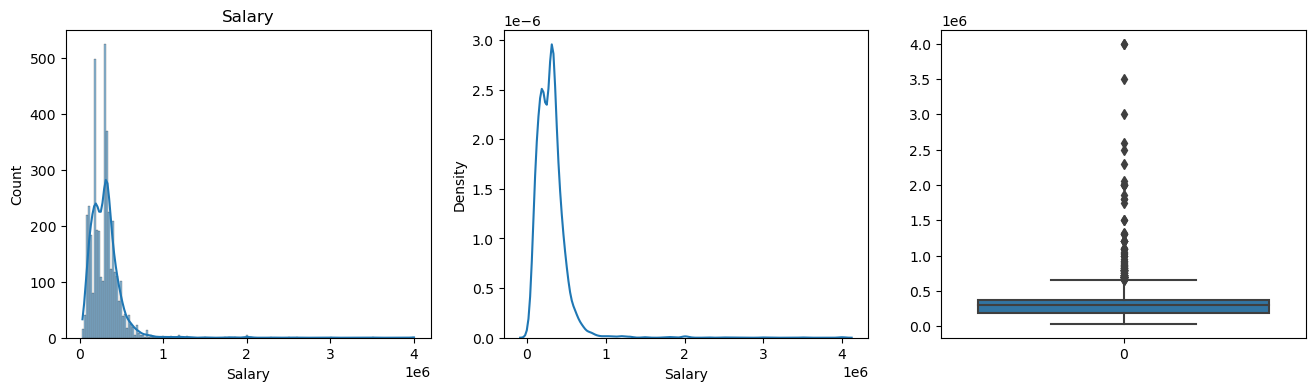

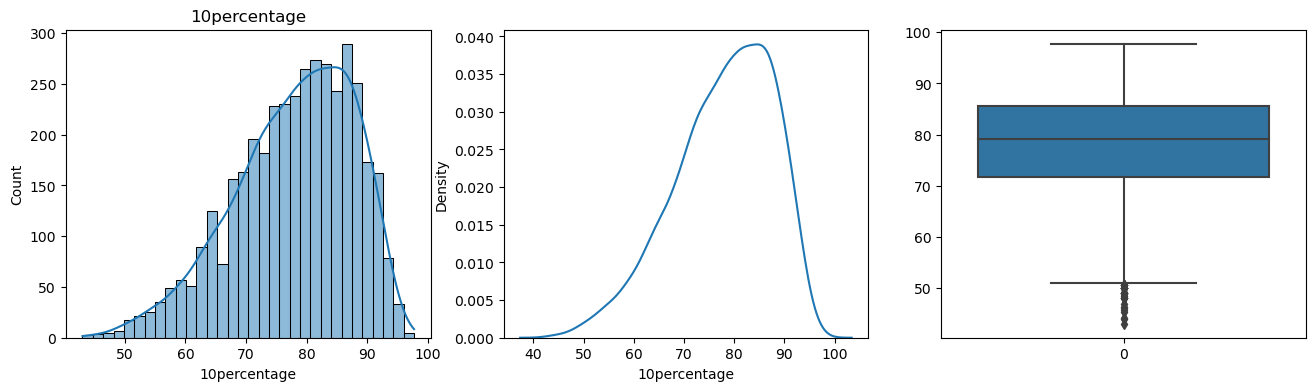

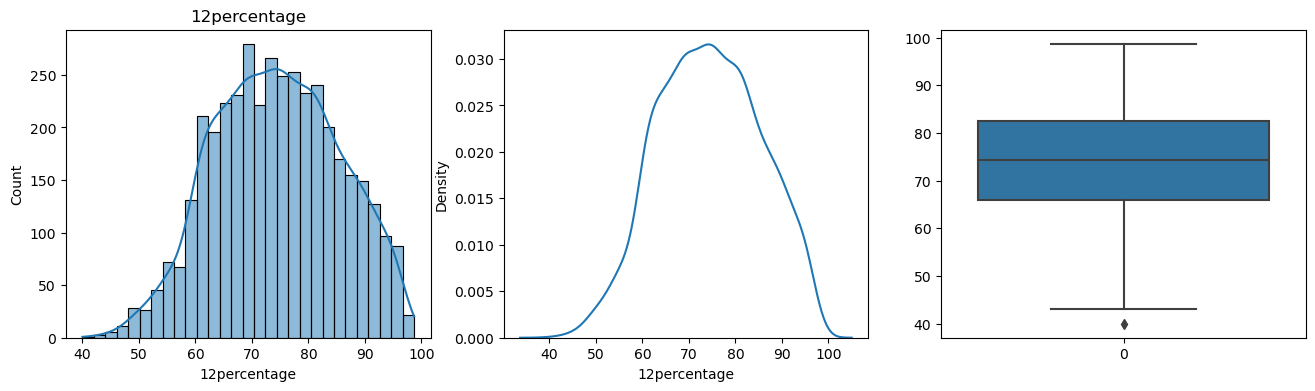

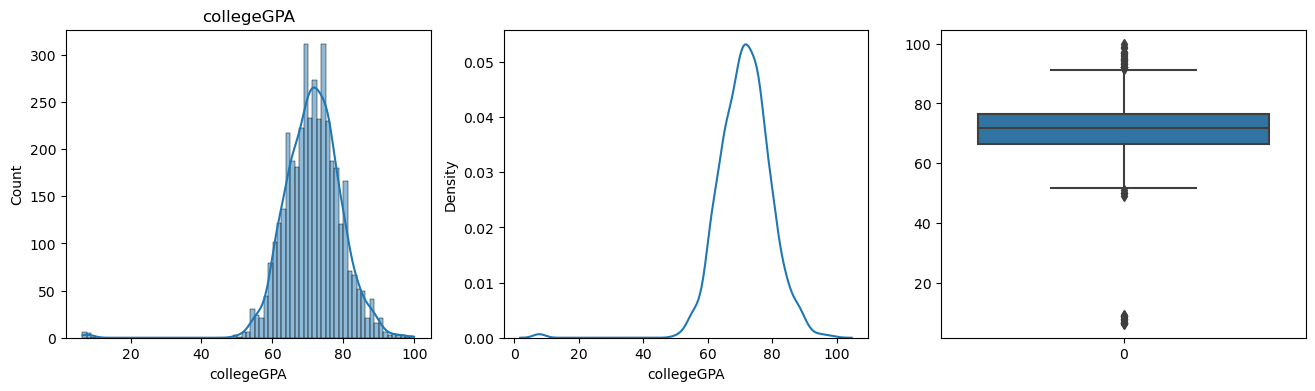

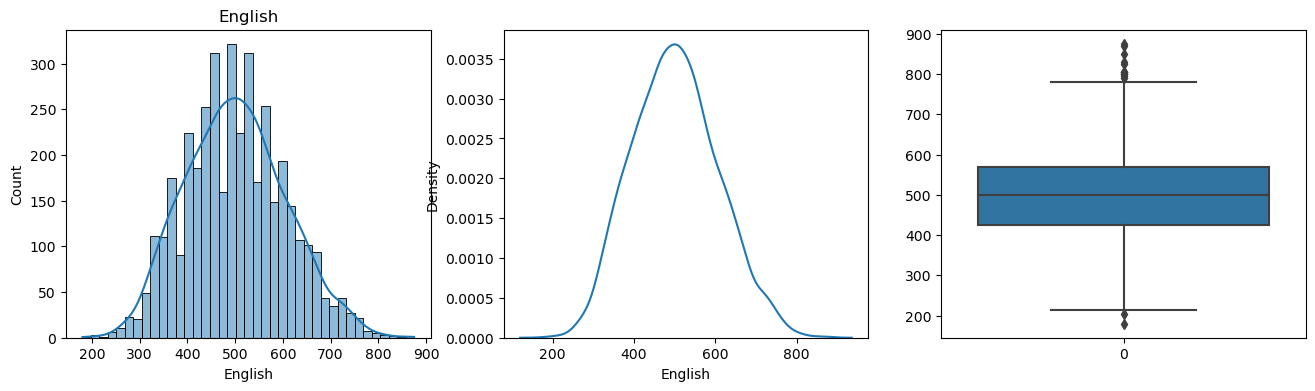

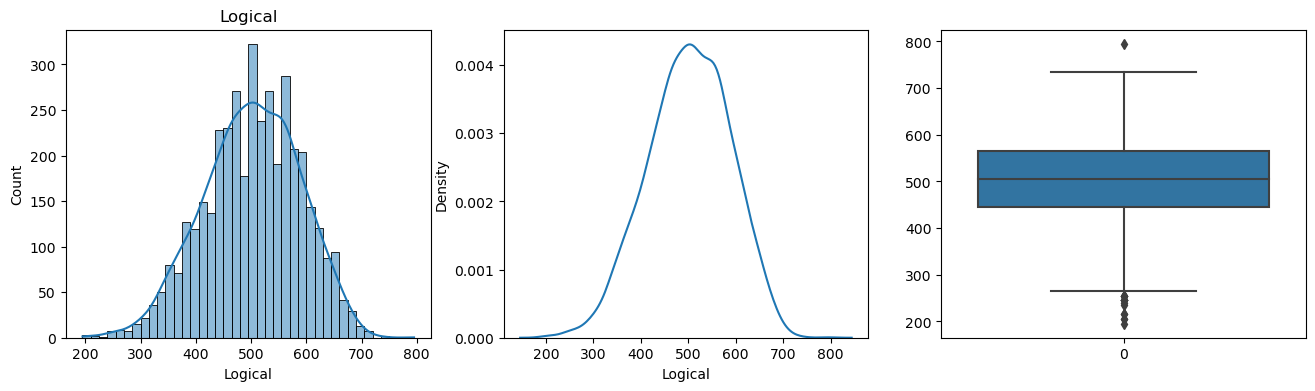

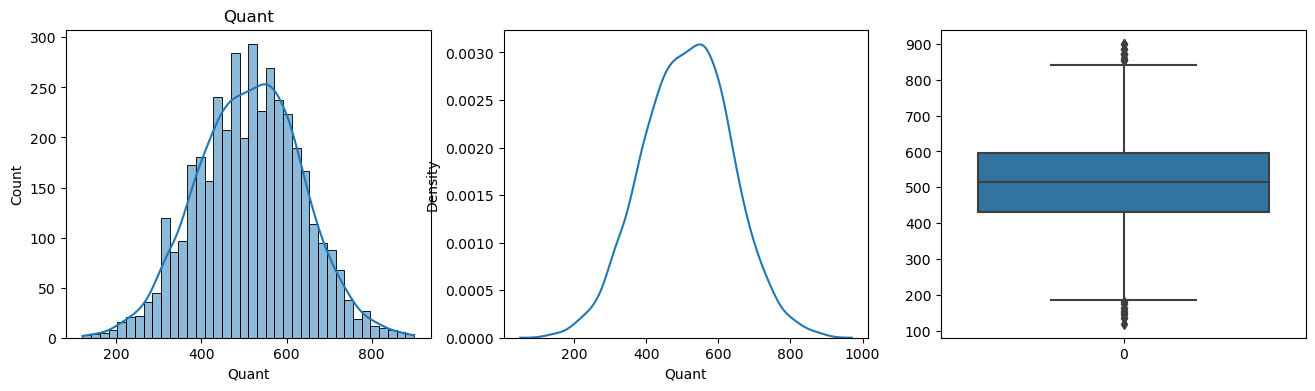

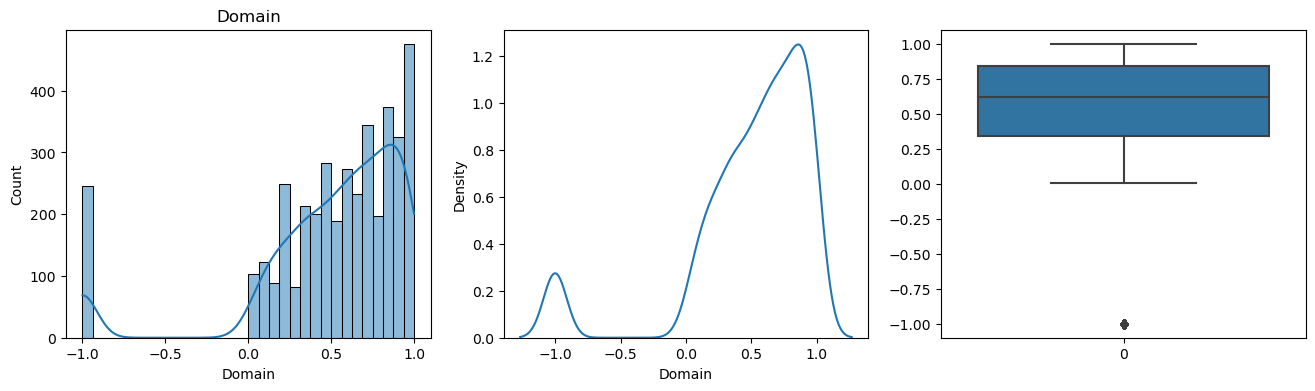

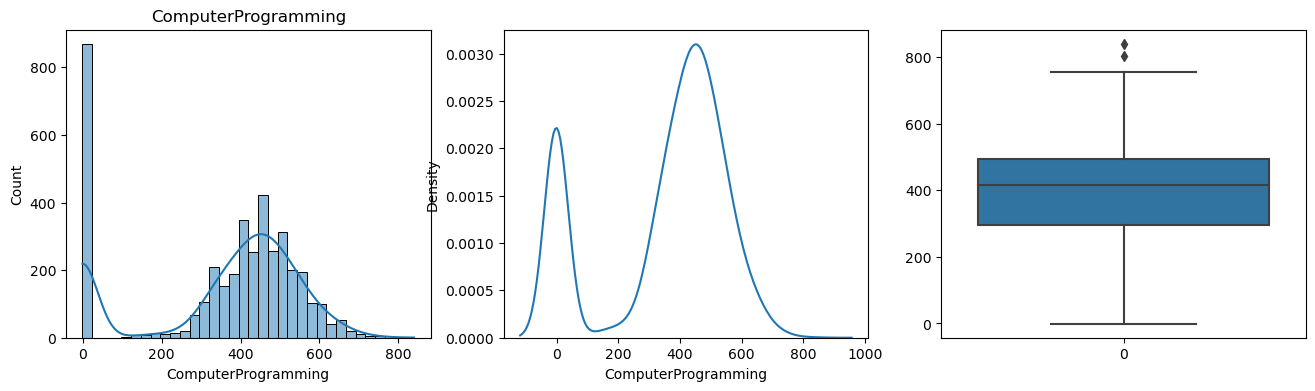

In [77]:
df_clean = df.copy()
# Define function to remove outliers using IQR
def remove_outliers_iqr(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column > lower_bound) & (column < upper_bound)]
cat_cols = df_clean.select_dtypes(include='category').columns.tolist()
for col in num_cols:
    fig, axs = plt.subplots(ncols=3, figsize=(16,4))
    sns.histplot(df_clean[col], kde=True, ax=axs[0])
    axs[0].set_title(col)
    sns.kdeplot(df_clean[col], ax=axs[1])
    sns.boxplot(df_clean[col], ax=axs[2])
    plt.show()

In [47]:
cat_df.head()

ID        DOJ                  DOL               Designation   
0  203097 2012-06-01              present   senior quality engineer  \
1  579905 2013-09-01              present         assistant manager   
2  810601 2014-06-01              present          systems engineer   
3  267447 2011-07-01              present  senior software engineer   
4  343523 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB                         10board   
0  Bangalore      f 1990-02-19  board ofsecondary education,ap  \
1     Indore      m 1989-10-04                            cbse   
2    Chennai      f 1992-08-03                            cbse   
3    Gurgaon      m 1989-12-05                            cbse   
4    Manesar      m 1991-02-27                            cbse   

                              12board       Degree   
0  board of intermediate education,ap  B.Tech/B.E.  \
1                                cbse  B.Tech/B.E.   
2                                cbse  B.Tech/B.E.   
3                                cbse  B.Tech/B.E.   
4                                cbse  B.Tech/B.E.   

                              Specialization    CollegeState  
0                       computer engineering  Andhra Pradesh  
1  electronics and communication engineering  Madhya Pradesh  
2                     information technology   Uttar Pradesh  
3                       computer engineering           Delhi  
4  electronics and communication engineering   Uttar Pradesh

In [48]:
def plot_boxplots(df):
    for col in num_cols:
        plt.figure()
        df.boxplot(column=col)
        plt.title(col)
        plt.show()

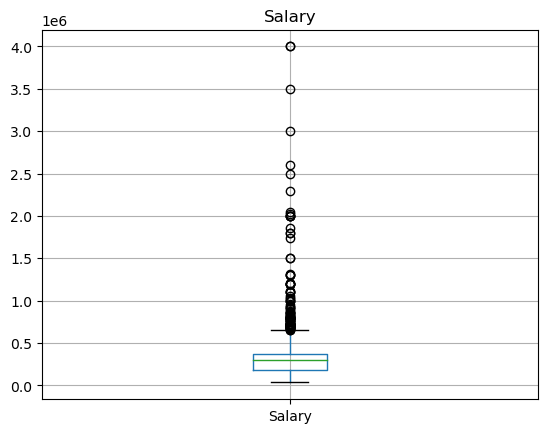

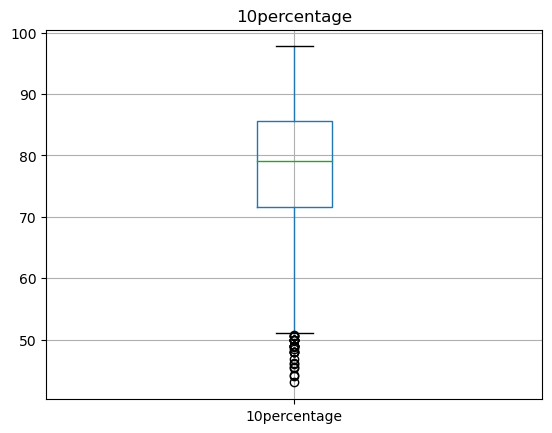

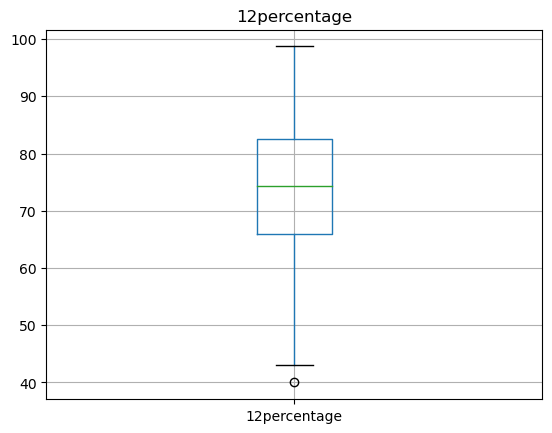

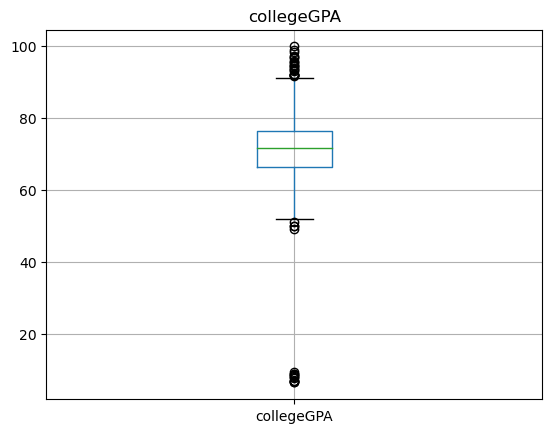

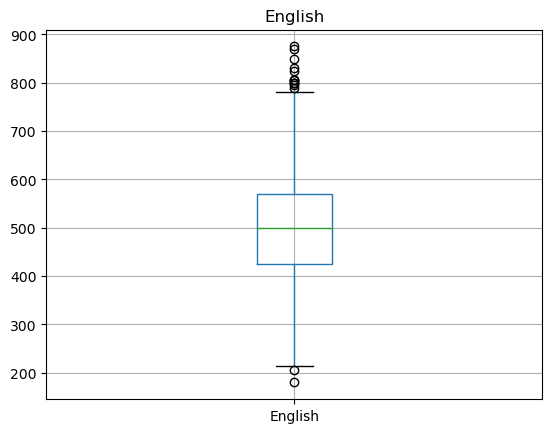

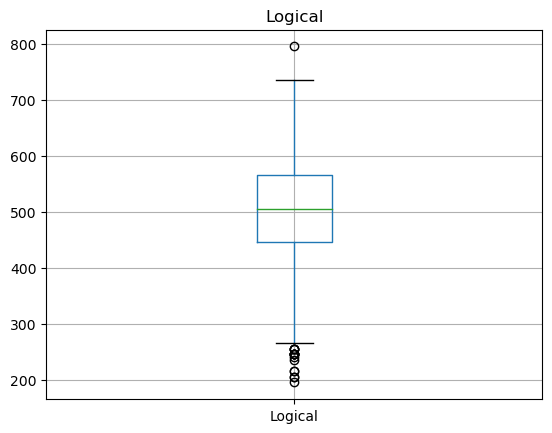

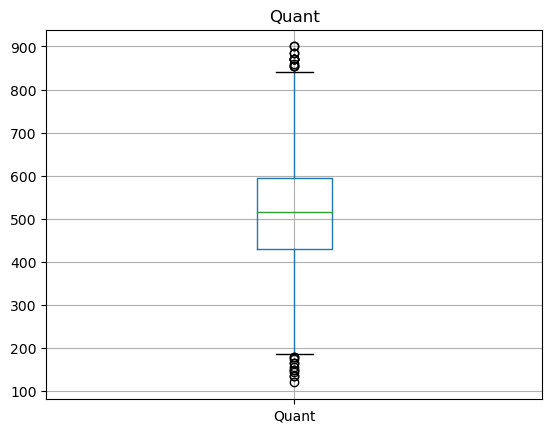

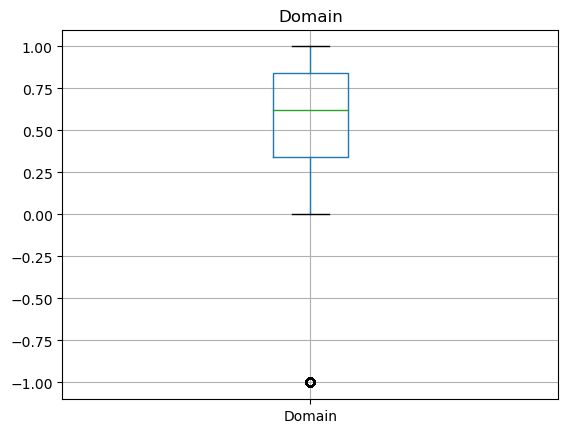

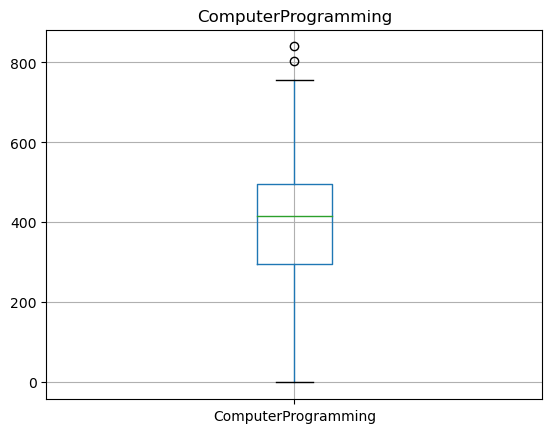

In [49]:
plot_boxplots(df)

In [50]:
def clean_data_by_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return cleaned_df
num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming']
num_df = df[num_cols]
num_df.head()

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant   
0   420000          84.3          95.8       78.00      515      585    525  \
1   500000          85.4          85.0       70.06      695      610    780   
2   325000          85.0          68.2       70.00      615      545    370   
3  1100000          85.6          83.6       74.64      635      585    625   
4   200000          78.0          76.8       73.90      545      625    465   

     Domain  ComputerProgramming  
0  0.635979                  445  
1  0.960603                   -1  
2  0.450877                  395  
3  0.974396                  615  
4  0.124502                   -1

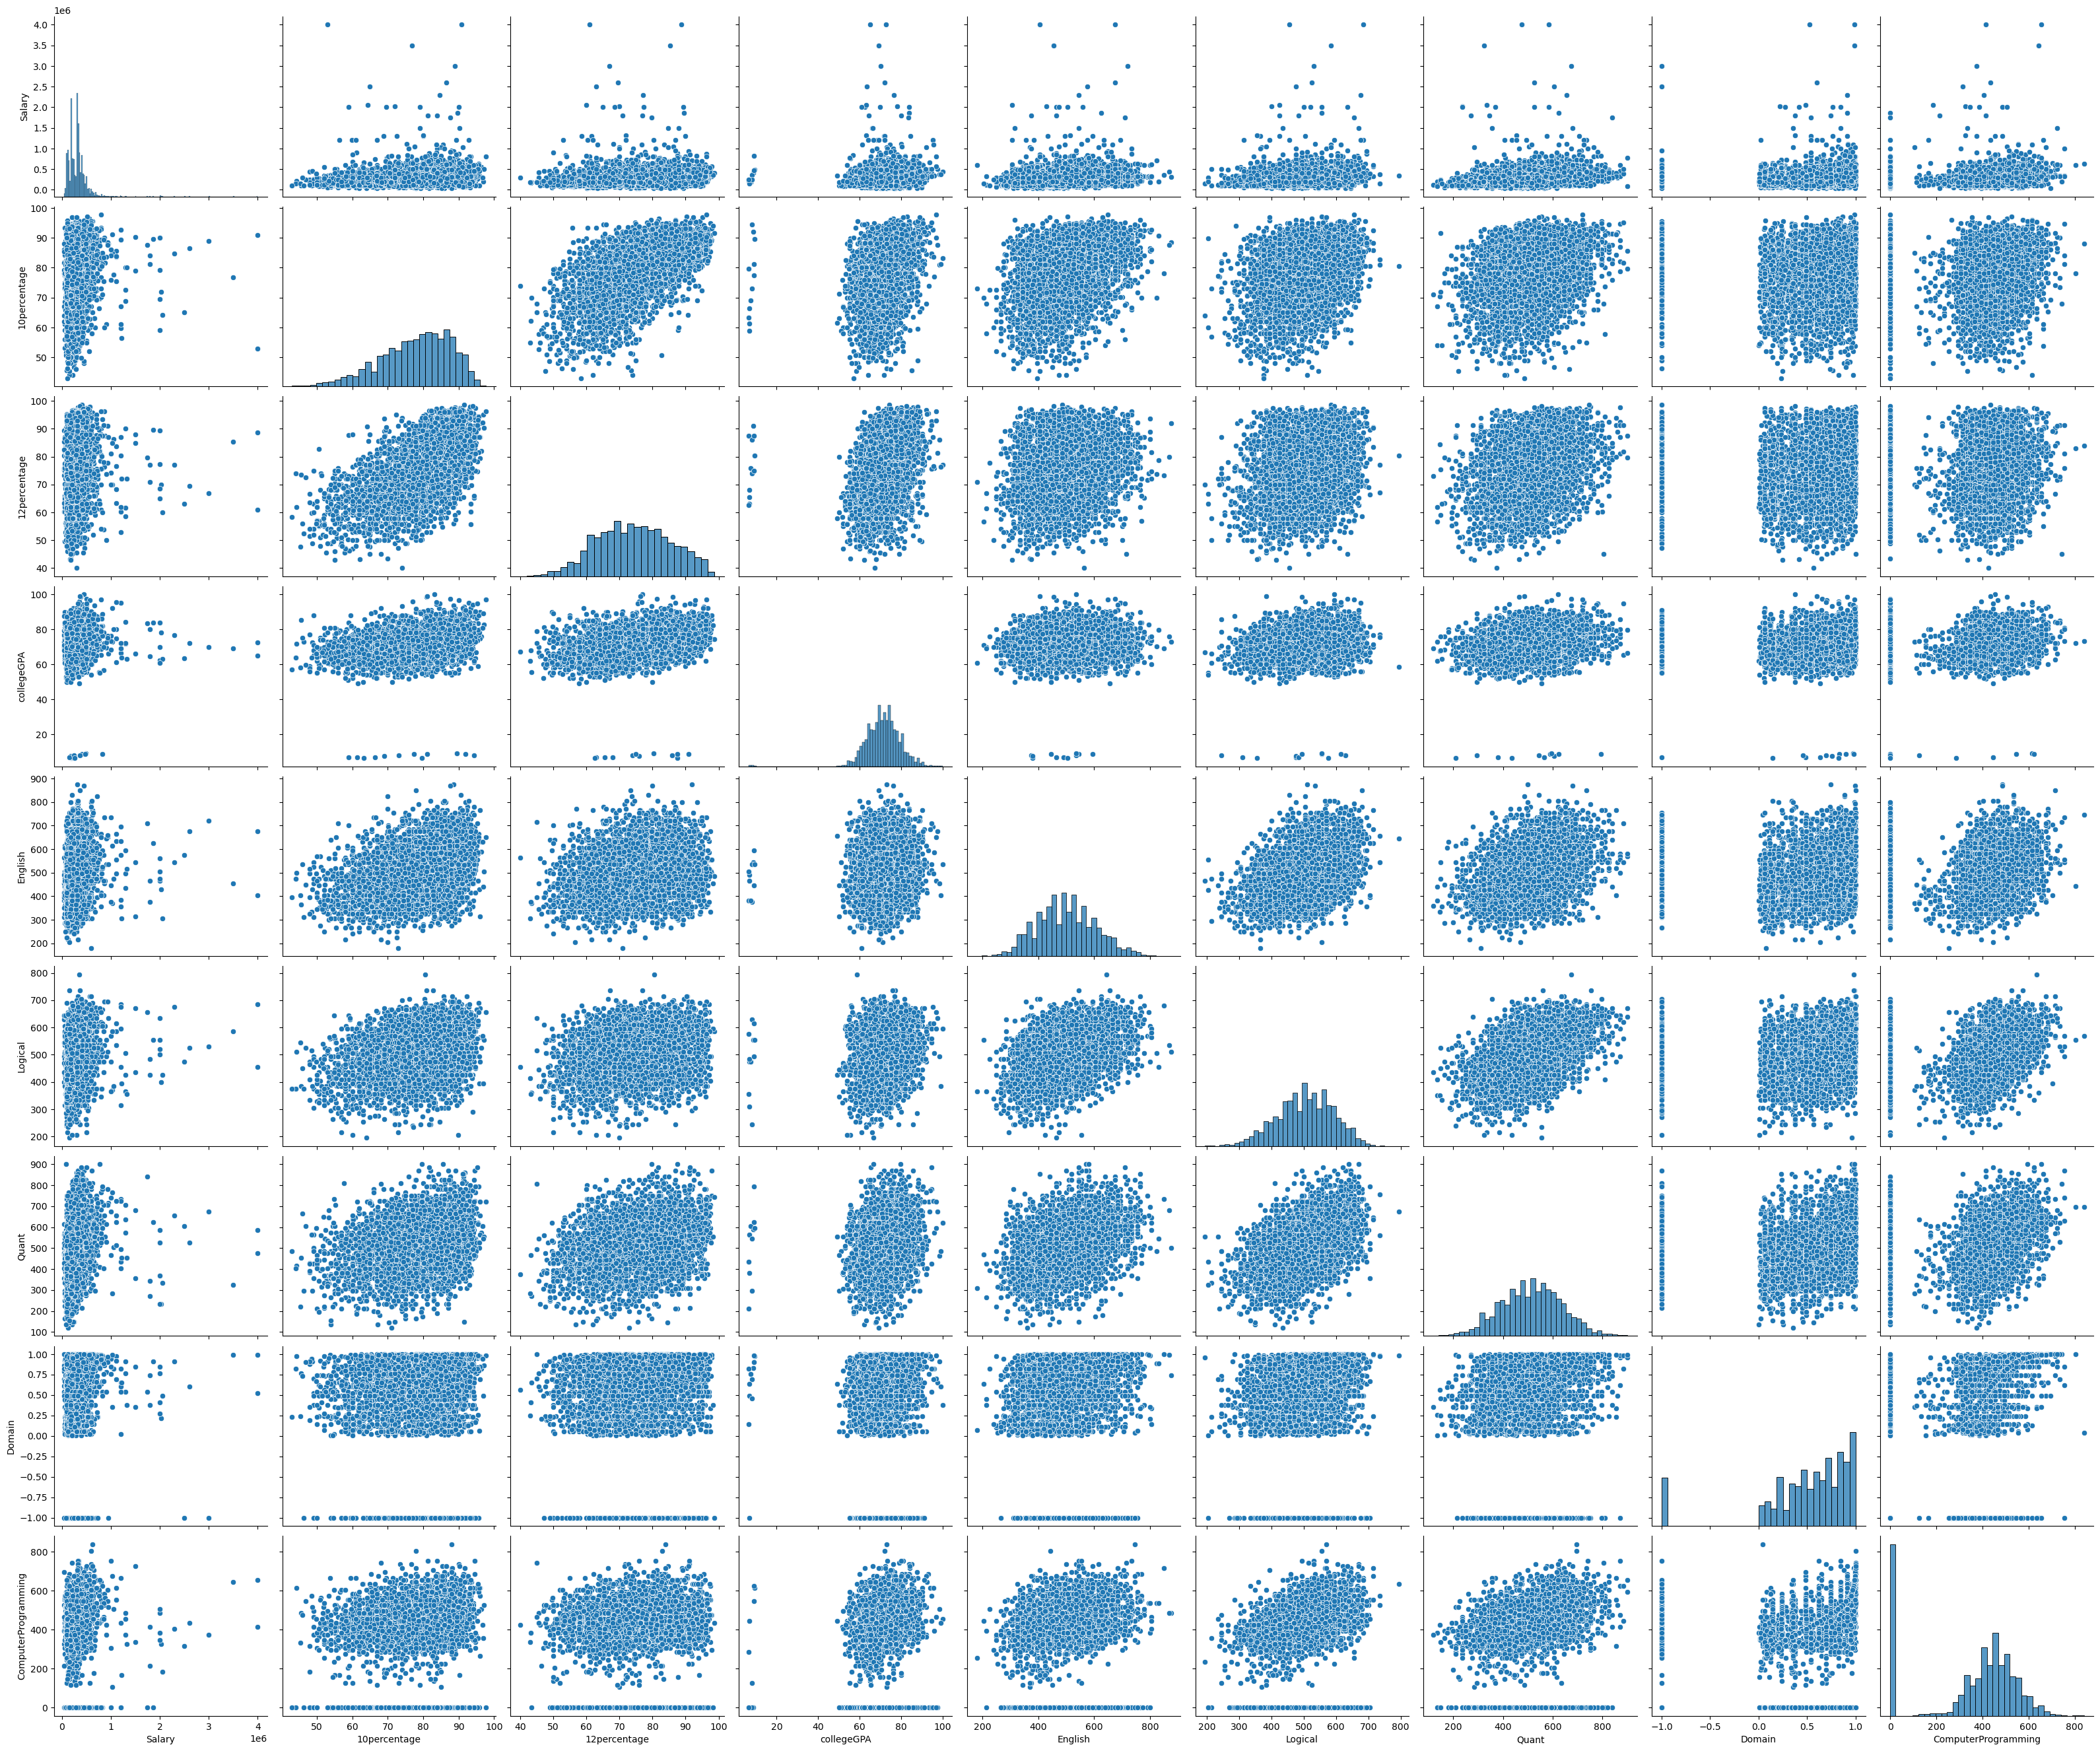

In [51]:
# Create a pair plot
sns.pairplot(df[num_cols], height=3, aspect=1.2)

In [52]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [53]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

<h1><b>Conclusion

In [ ]:
cont_table = pd.crosstab(df['Gender'], df['Specialization'])
chi2, p, dof, expected = chi2_contingency(cont_table)
print(f"Chi-Squared Statistic: {chi2:.2f}")
